# REPORT AXA Data Challenge  
  
Mahmut CAVDAR (mahmutcvdr@gmail.com), Anh Khoa NGO HO (anh-khoa.ngo-ho@u-psud.fr), Trong Bach VU (jsbachvu@gmail.com)  
M2 AIC - Paris Saclay University  

In [1]:
%matplotlib inline
import os
import glob
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
from __future__ import unicode_literals
import pandas as pd
from datetime import datetime

In [2]:
# data_csv_number.to_csv('./data/train_data_number.csv', sep=',', index=False)
data_csv_number = pd.read_csv('./data/data_train_final.csv')
uni_ass = np.unique(data_csv_number['ASS_ASSIGNMENT'])
print data_csv_number.keys()
print uni_ass

data_csv_number['DATE'] = pd.to_datetime(data_csv_number['DATE'], format="%d/%m/%Y %H:%M.%S")
data_csv_number['DATE2'] = data_csv_number['DATE']

Index([u'ASS_ASSIGNMENT', u'DATE', u'DAY_OFF', u'WEEK_END', u'DAY_WE_DS',
       u'TPER_TEAM', u'prediction', u'year', u'month', u'day', u'hour',
       u'minute', u'moment'],
      dtype='object')
['CAT' 'CMS' 'Crises' 'Domicile' 'Evenements' 'Gestion'
 'Gestion - Accueil Telephonique' 'Gestion Amex' 'Gestion Assurances'
 'Gestion Clients' 'Gestion DZ' 'Gestion Relation Clienteles'
 'Gestion Renault' 'Japon' 'Manager' 'M\xc3\xa9canicien' 'M\xc3\xa9dical'
 'Nuit' 'Prestataires' 'RENAULT' 'RTC' 'Regulation Medicale' 'SAP'
 'Services' 'Tech. Axa' 'Tech. Inter' 'Tech. Total'
 'T\xc3\xa9l\xc3\xa9phonie']


In [3]:
# PLot on result + train

result = pd.read_csv('./results/mamuth.txt', sep='\t')
result['DATE'] = pd.to_datetime(result['DATE'])
result['DATE2'] = result['DATE']
tmp = result
# tmp = result[result['DATE'] >= '01-06-2013']
tmp = tmp[tmp['ASS_ASSIGNMENT'] == 'CAT']
# tmp = tmp.set_index('DATE')

C:\Program Files\Anaconda2\lib\site-packages\pandas\core\ops.py:683: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  result = lib.scalar_compare(x, y, op)


# Preprocesscing data
  
1. DATE 2013-12-31 23:00:00.000  
    => year  
    => month  
    => day  
    => hour + minute = range(0-47). For ex, 1:00=2, 1:30=3, 2:00=4, etc  
2. ASS_ASSIGNMENT [1->n uni_ass]
3. DAY_OFF (holidays)
4. WEEK_END {1,0}
5. DAY_WE_DS [ lundi-> dimanche = 0 -> 6]
6. TPER_TEAM {'Nuit' -> 0, 'Jours' -> 1}

In [4]:
data_csv_number[data_csv_number['DATE2'] >= '26-3-2011']
# data_csv_number[data_csv_number['DAY_OFF'] == 1]

,ASS_ASSIGNMENT,DATE,DAY_OFF,WEEK_END,DAY_WE_DS,TPER_TEAM,prediction,year,month,day,hour,minute,moment,DATE2
1564,CAT,2011-03-28 07:30:00,0,0,0,1,0,2011,3,28,7,30,15,2011-03-28 07:30:00
1565,CAT,2011-03-28 08:00:00,0,0,0,1,21,2011,3,28,8,0,16,2011-03-28 08:00:00
1566,CAT,2011-03-28 08:30:00,0,0,0,1,42,2011,3,28,8,30,17,2011-03-28 08:30:00
1567,CAT,2011-03-28 09:00:00,0,0,0,1,69,2011,3,28,9,0,18,2011-03-28 09:00:00
1568,CAT,2011-03-28 09:30:00,0,0,0,1,83,2011,3,28,9,30,19,2011-03-28 09:30:00
1569,CAT,2011-03-28 10:00:00,0,0,0,1,92,2011,3,28,10,0,20,2011-03-28 10:00:00
1570,CAT,2011-03-28 10:30:00,0,0,0,1,86,2011,3,28,10,30,21,2011-03-28 10:30:00
1571,CAT,2011-03-28 11:00:00,0,0,0,1,112,2011,3,28,11,0,22,2011-03-28 11:00:00
1572,CAT,2011-03-28 11:30:00,0,0,0,1,86,2011,3,28,11,30,23,2011-03-28 11:30:00
1573,CAT,2011-03-28 12:00:00,0,0,0,1,55,2011,3,28,12,0,24,2011-03-28 12:00:00


In [16]:
subdata = dict()
for ass in uni_ass:
    subdata[ass] = data_csv_number[data_csv_number['ASS_ASSIGNMENT'] == ass]
    subdata[ass] = subdata[ass].set_index(['DATE'], drop=True)

In [7]:
#Create sub plot data 
X = dict()
Y = dict()

for ass in uni_ass:
    X[ass] = subdata[ass].drop(['ASS_ASSIGNMENT','prediction', 'year', 'month', 'day', 'hour', 'minute'], axis=1).values
    Y[ass] = subdata[ass]['prediction'].values
    


# Plot

In [8]:
from matplotlib.pylab import rcParams, rc
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

# rcParams['figure.figsize'] = 15, 2

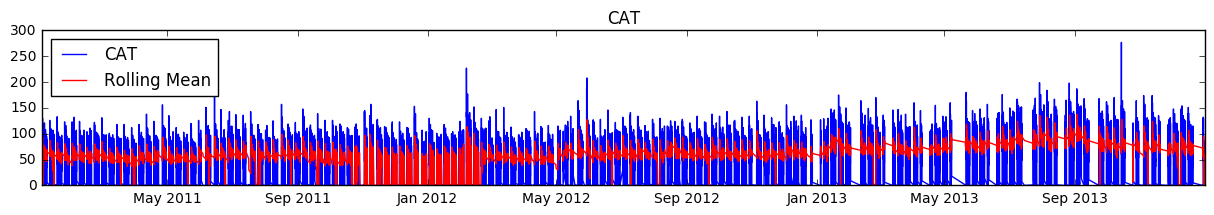

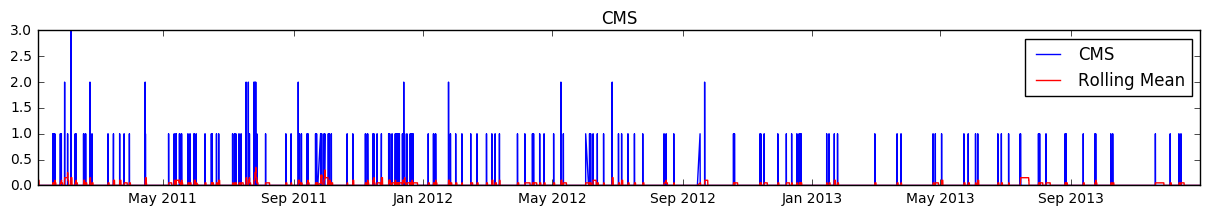

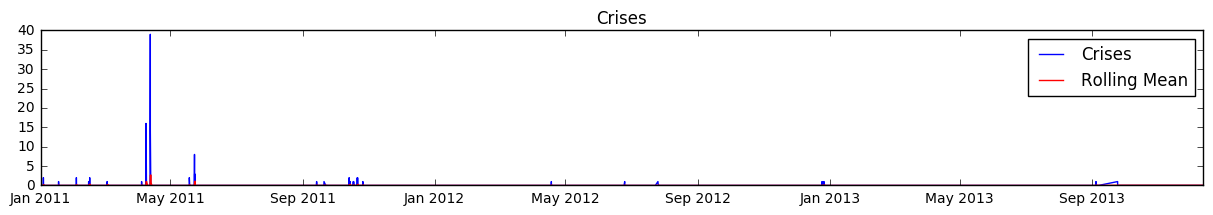

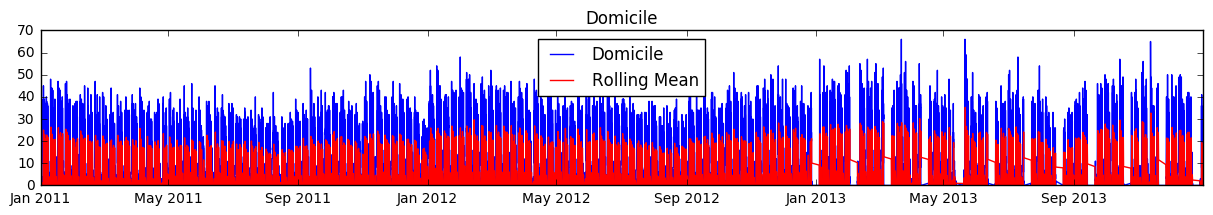

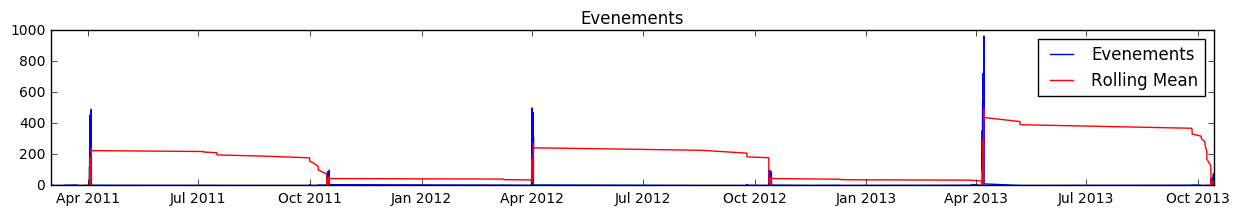

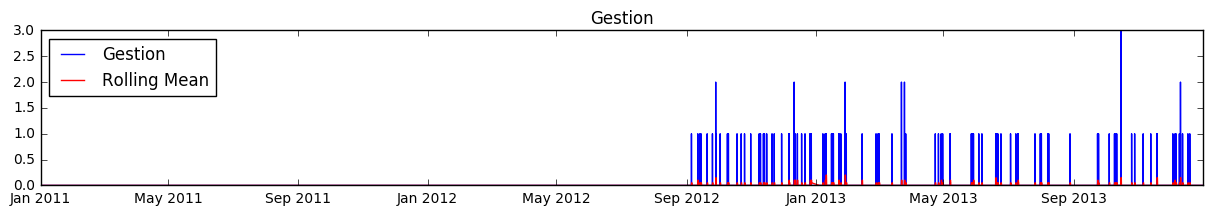

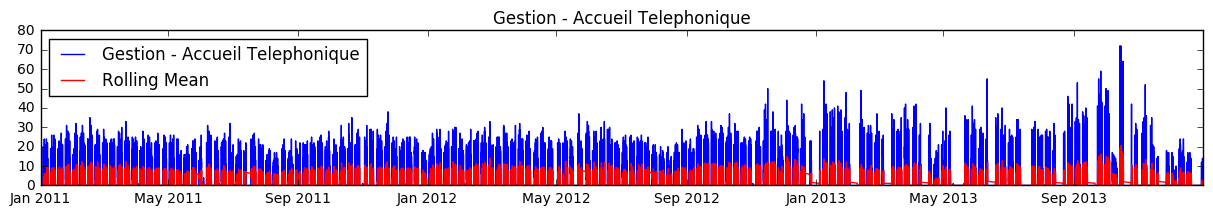

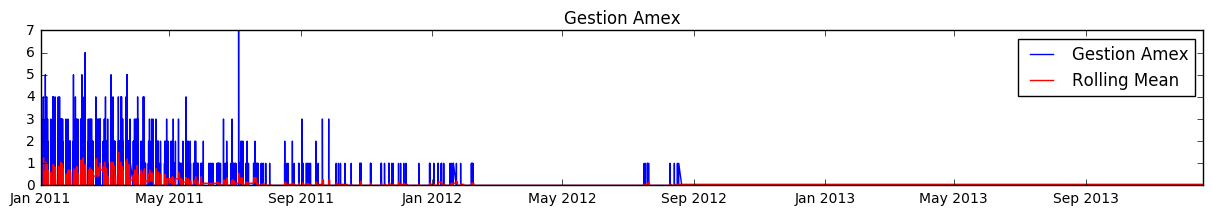

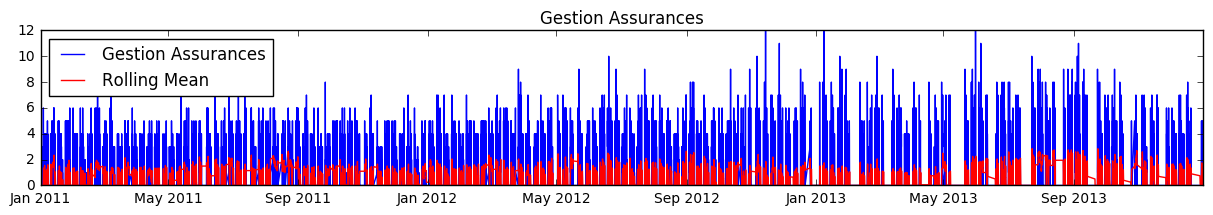

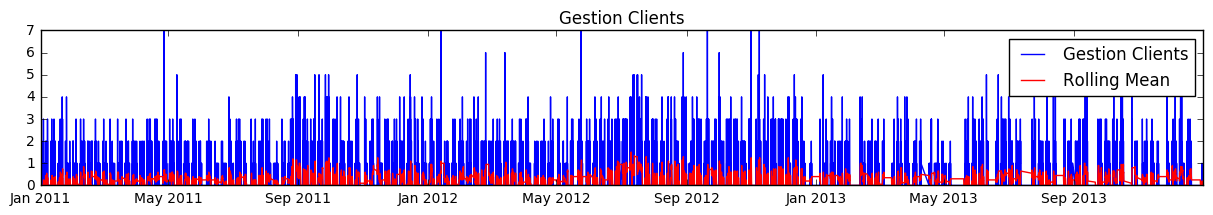

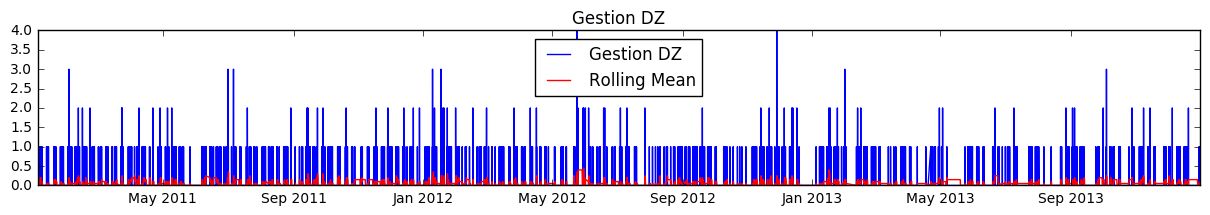

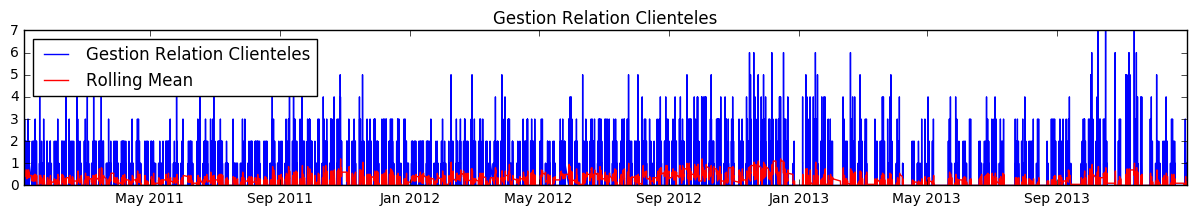

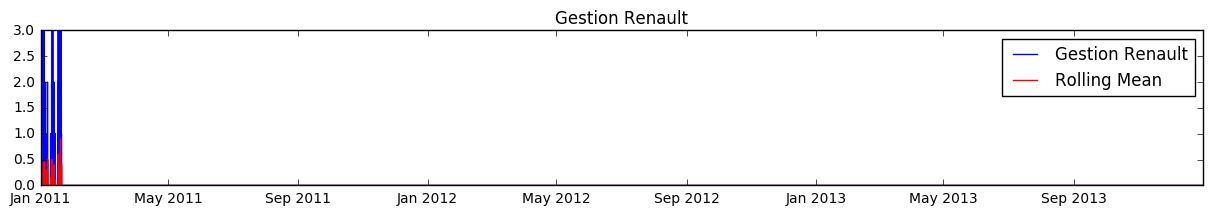

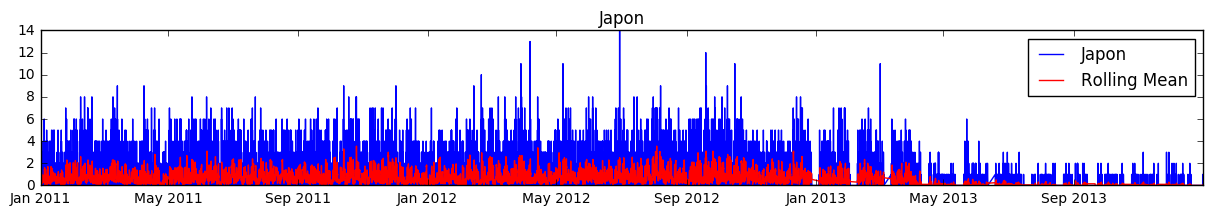

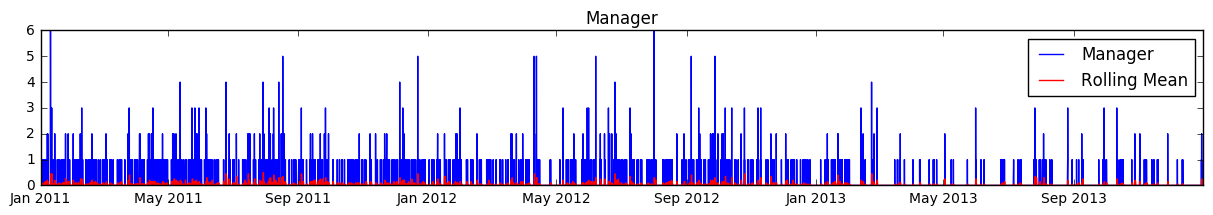

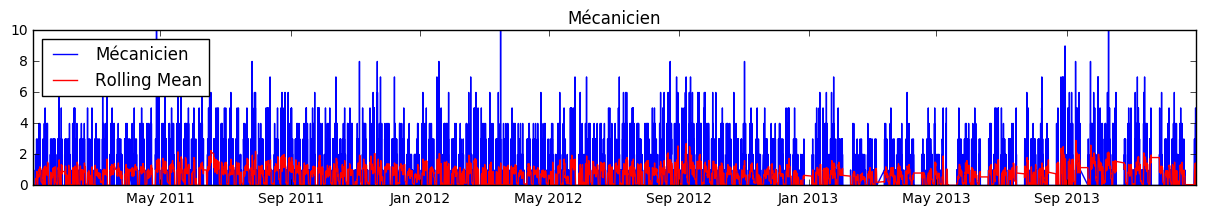

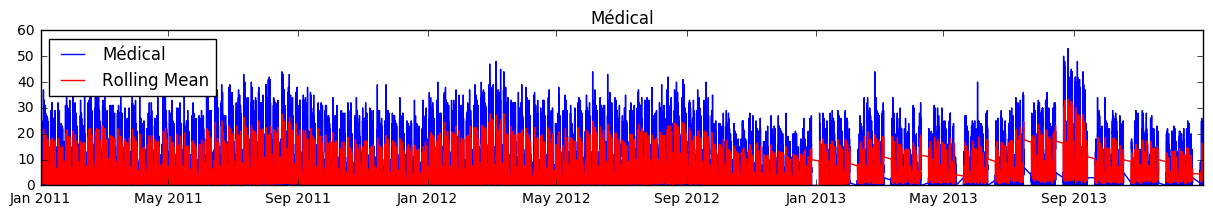

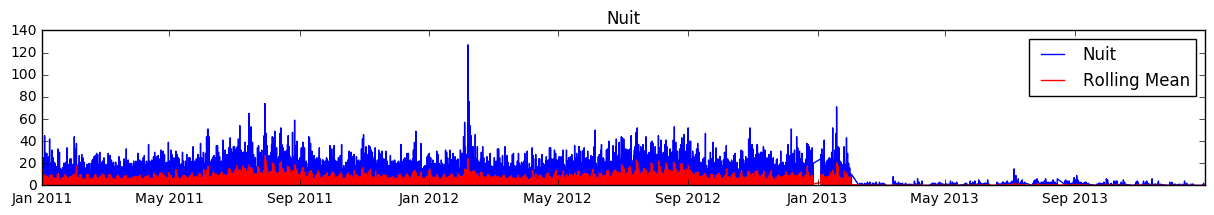

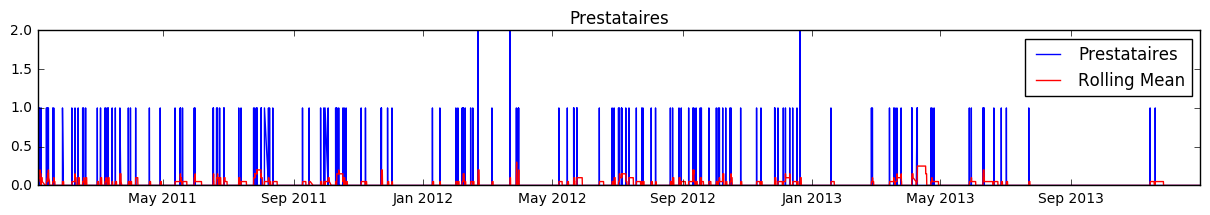

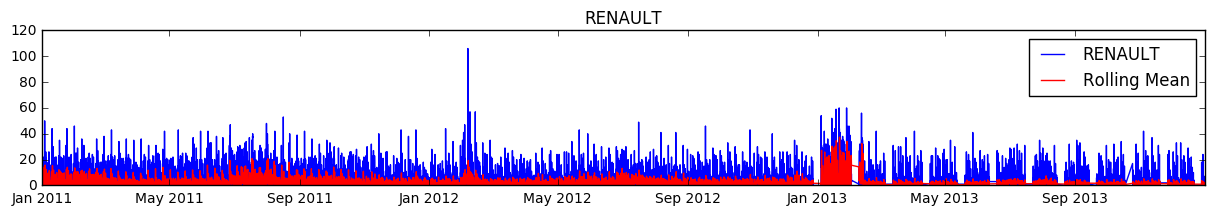

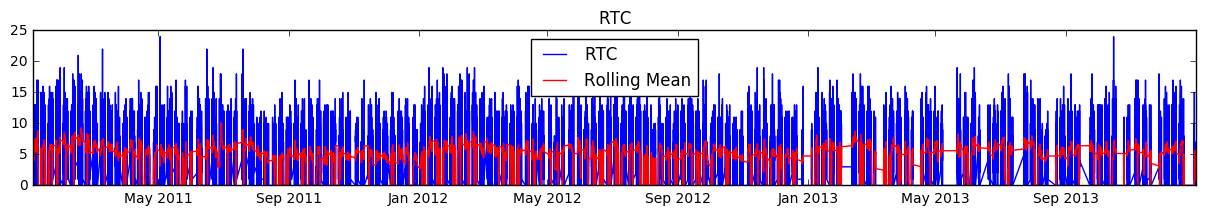

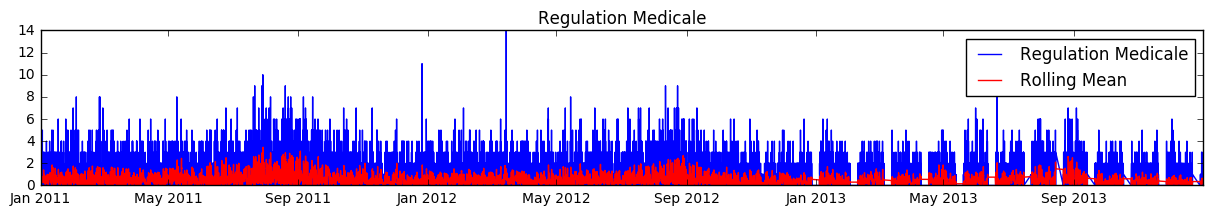

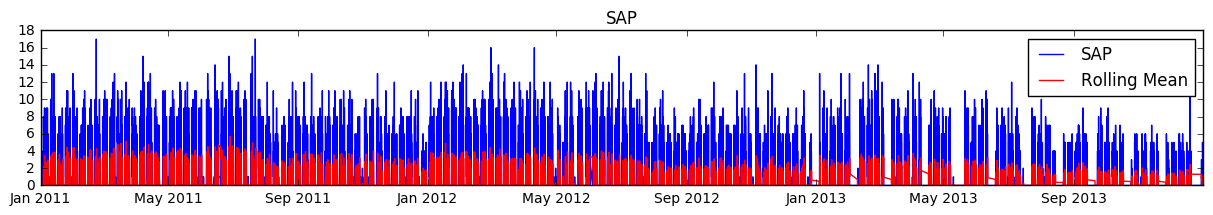

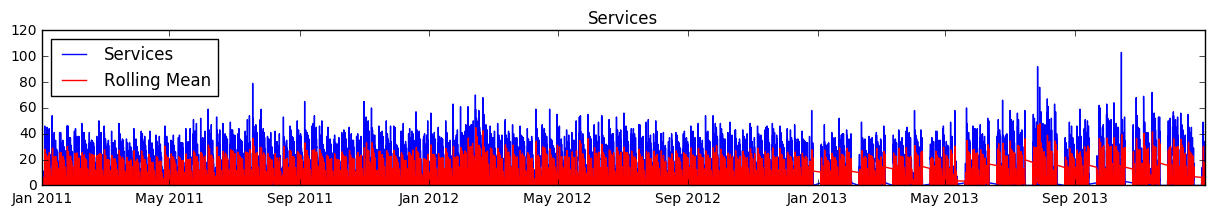

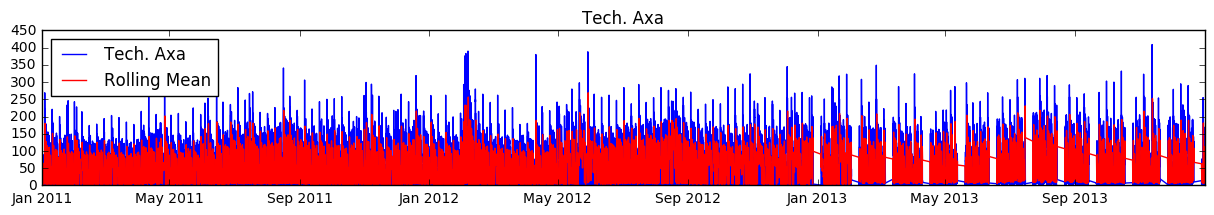

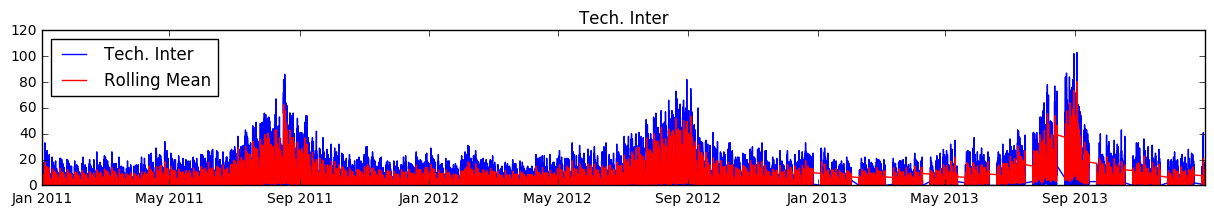

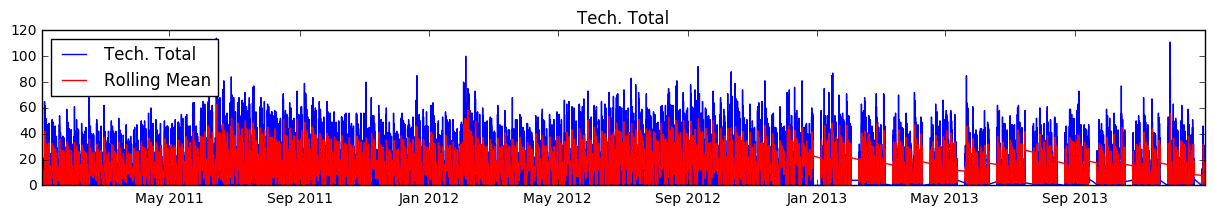

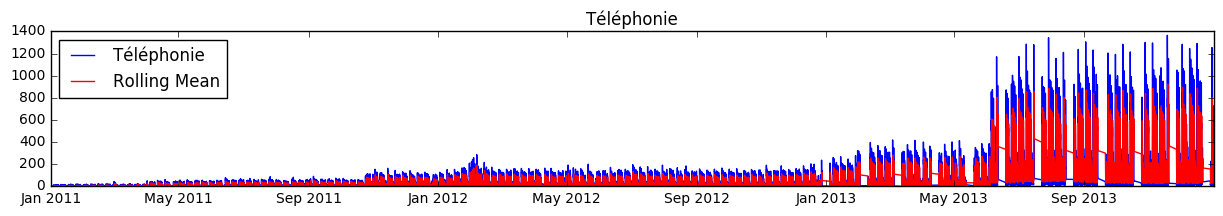

In [9]:
for ass,i in zip( uni_ass,range(len(uni_ass)) ):
    plt.figure(figsize=(15,2))
    plt.plot(subdata[ass]['prediction'], label=ass)
    plt.plot(pd.rolling_mean(subdata[ass]['prediction'], window=20), color='red', label='Rolling Mean')
#     plt.plot(pd.rolling_std(subdata[ass]['prediction'], window=12), color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title(ass)

we can see: there are some features have some anormal seasonalities, and somes are non-stationary. They are two of principals facteurs cause our problems of prediction.
For ex. 
1. Téléphonie has a increasing trend until 01/2012, anormal seasonalities 2/2012, 6/2013 -> 7/2013: a increasing unexpectedly number of calls. 
2. Tech. Axa is seem to be a bit stationary, but there are also some anormal seasonalities (such as 03/2012). That means, in the 03/2013, our regressor can mispredict the values on these periodes and the score will augment.
  
Therefore, We can estimate assosiations drive to a worse score, and we should use some special strategies to resolve each problem.

Distribution of number of calls

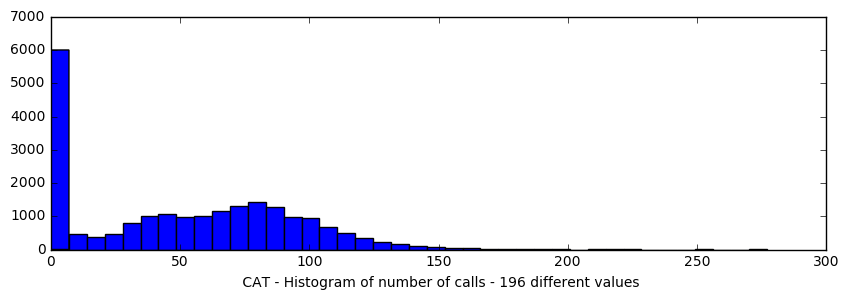

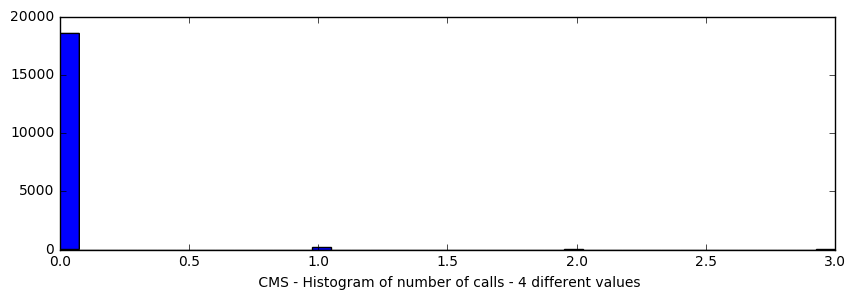

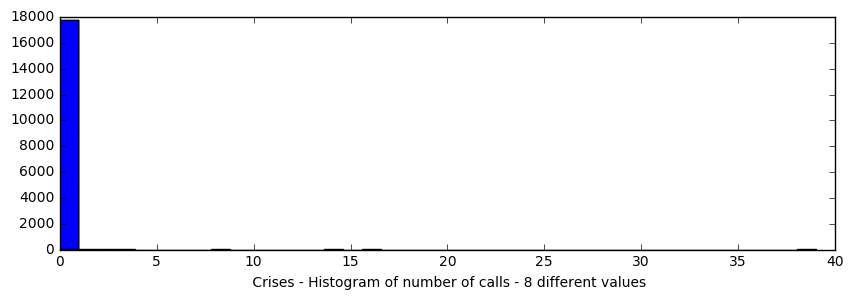

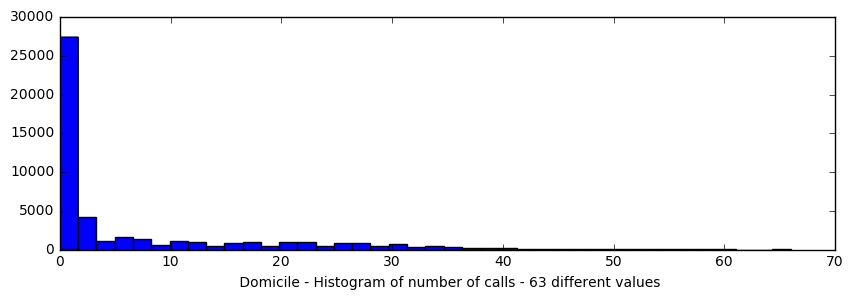

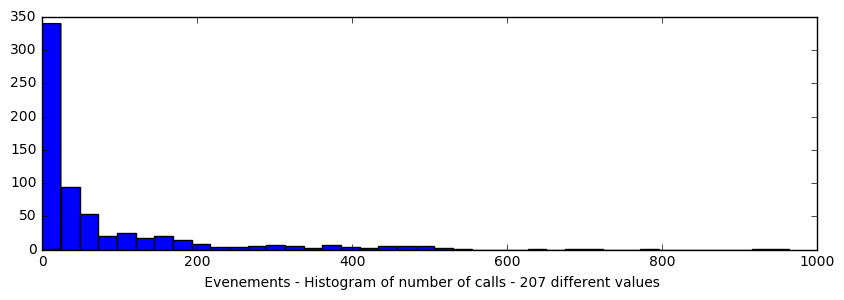

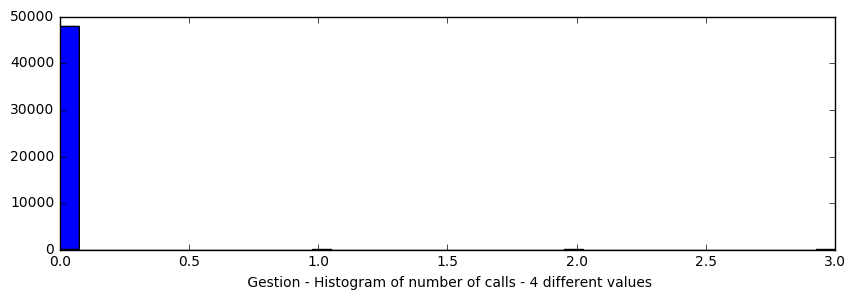

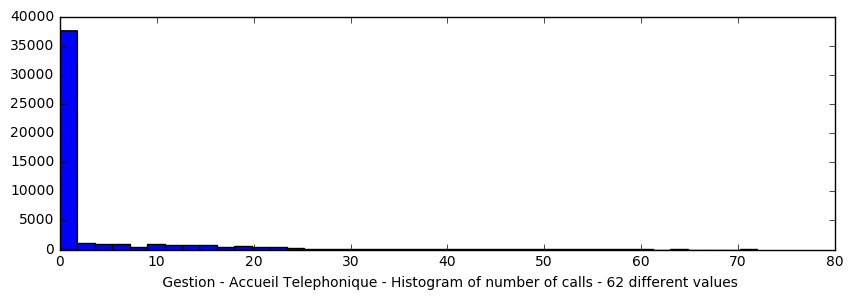

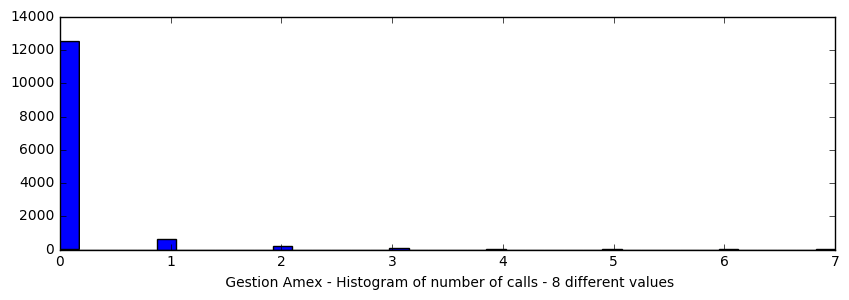

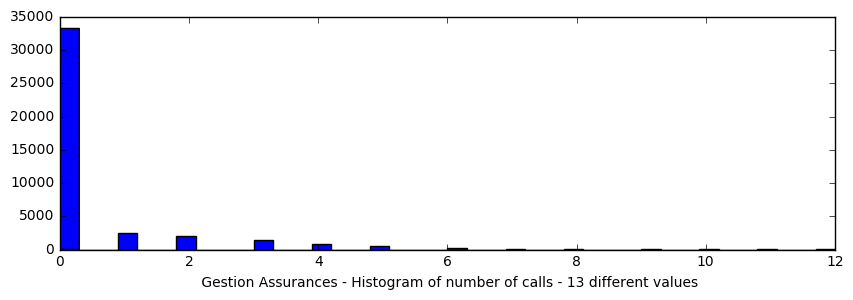

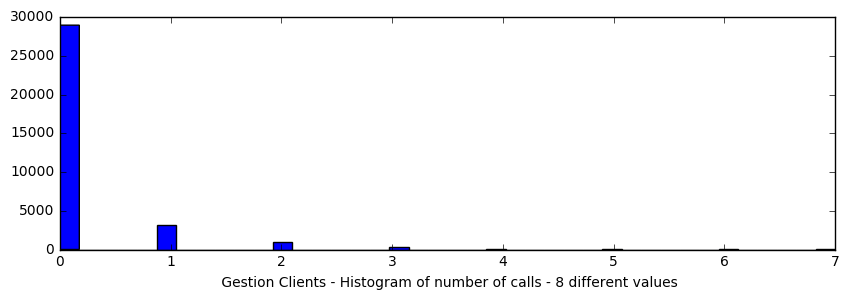

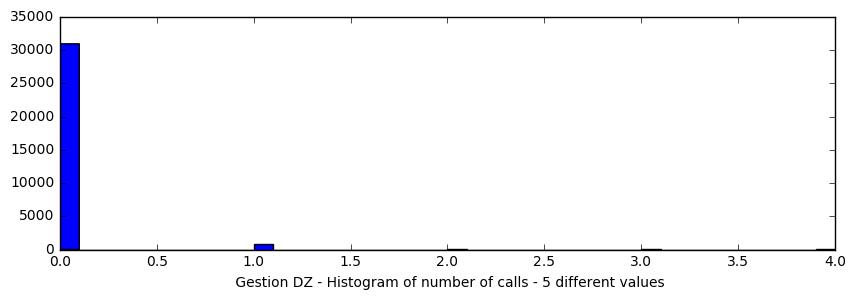

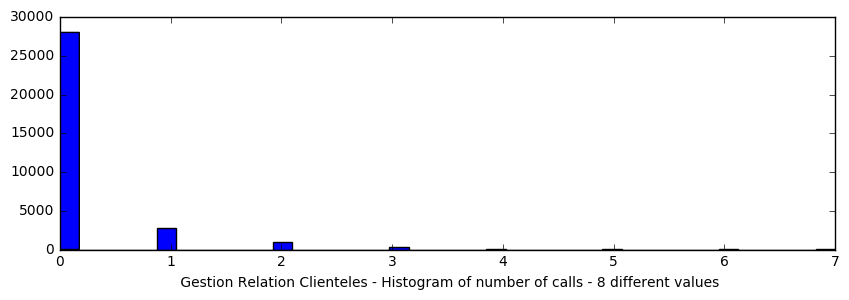

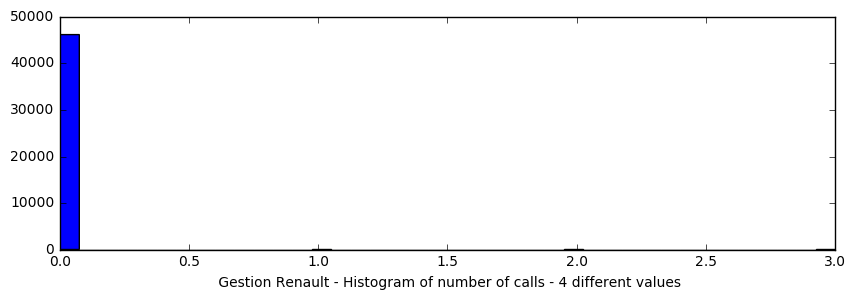

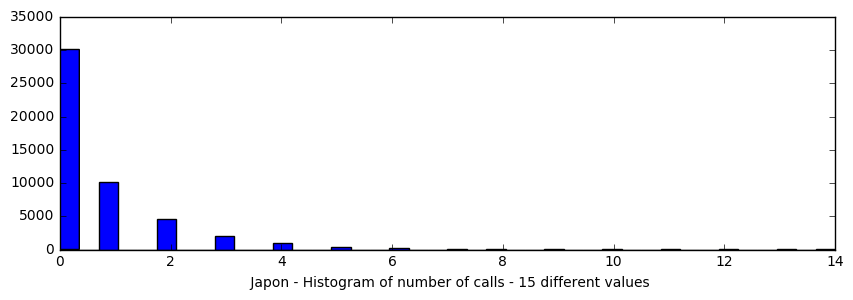

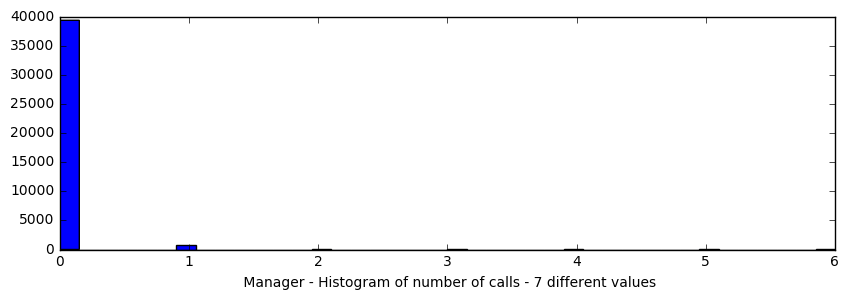

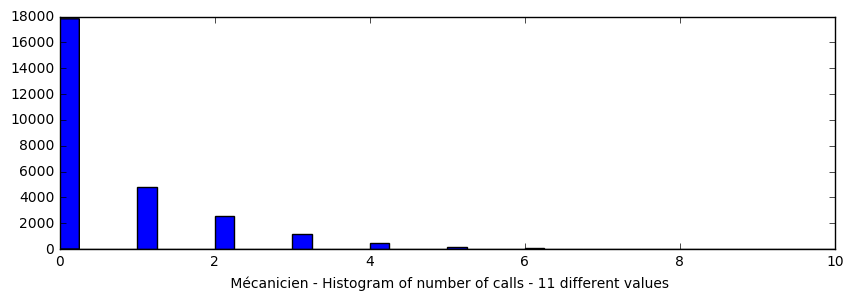

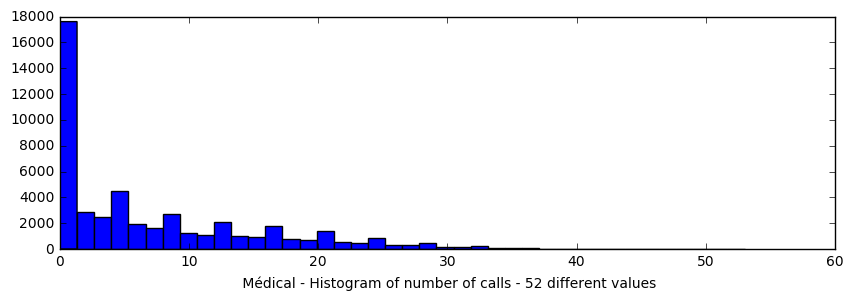

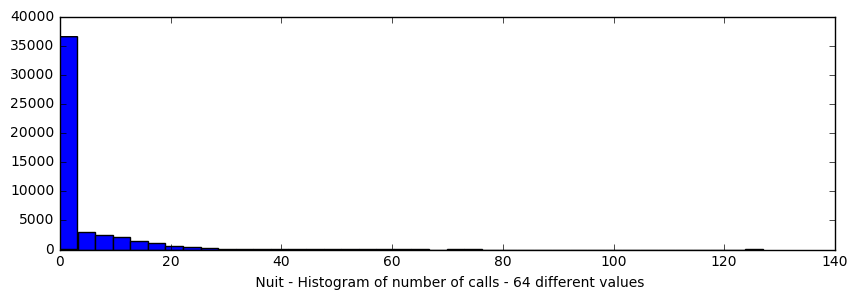

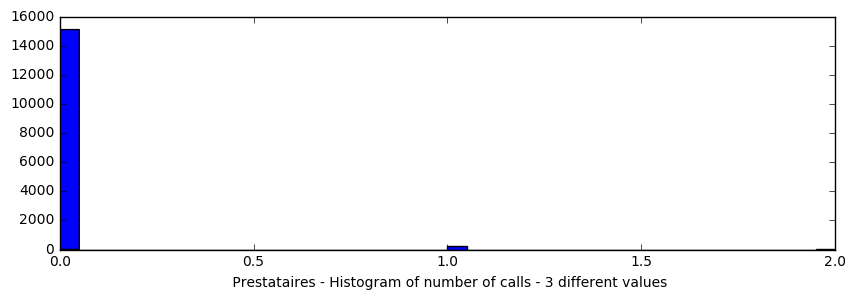

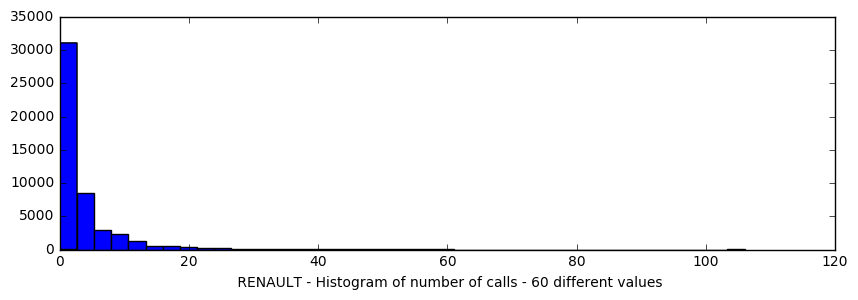

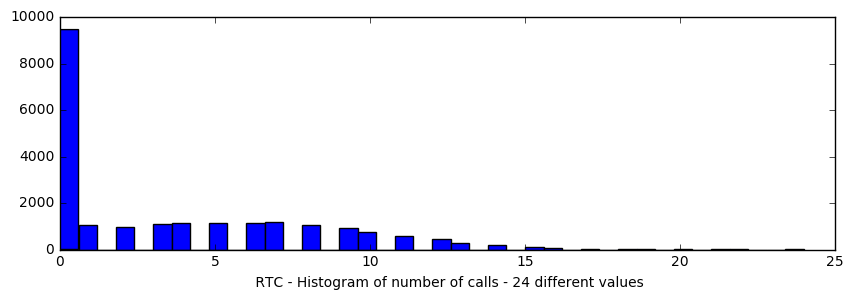

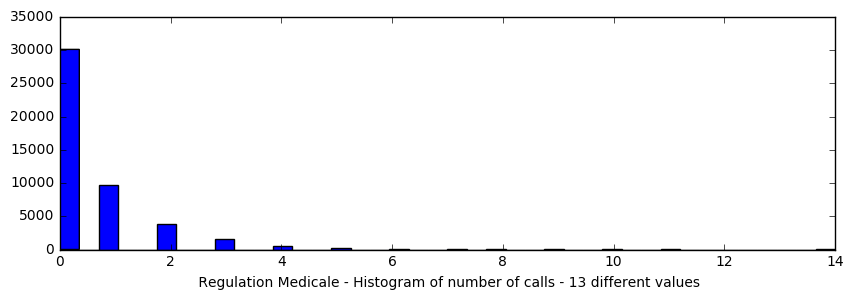

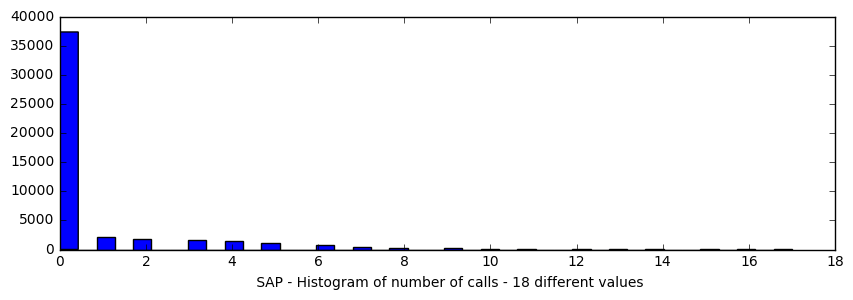

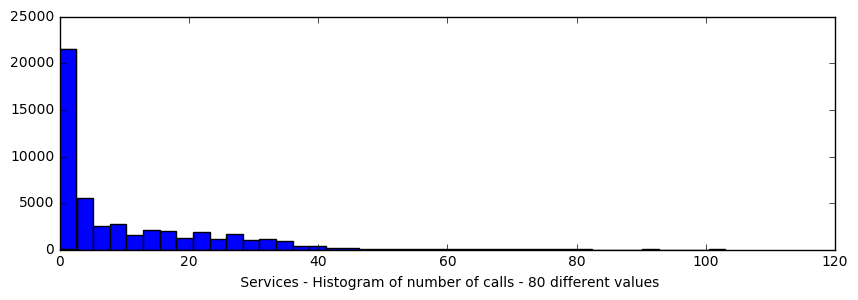

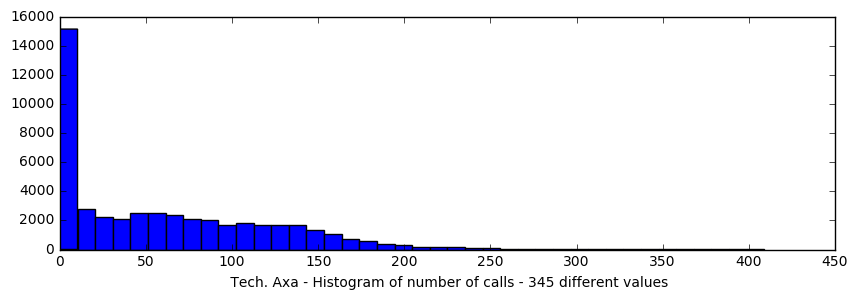

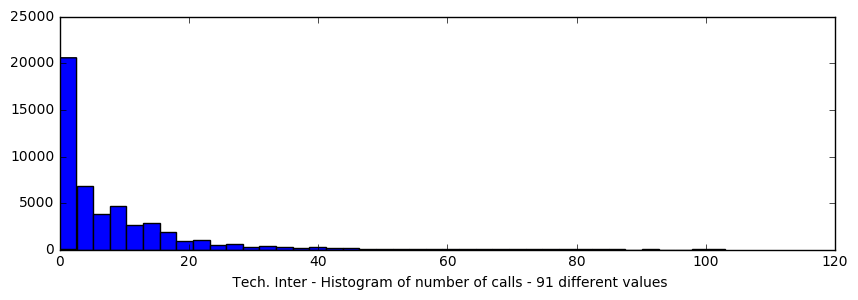

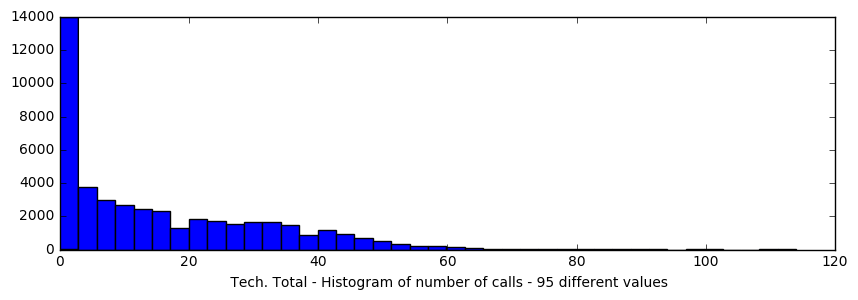

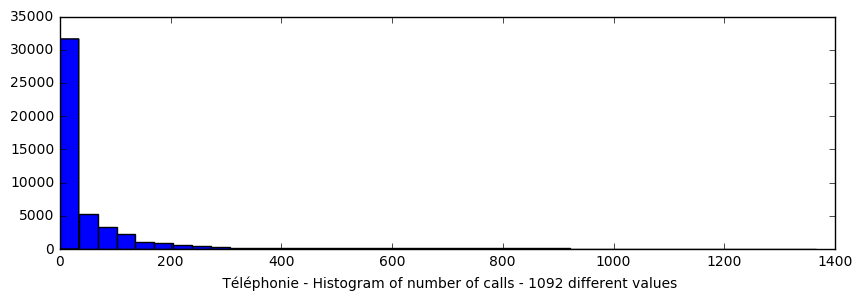

In [11]:
for ass in uni_ass:
    plt.figure(figsize=(10,3))
    plt.hist(subdata[ass]['prediction'], bins=40)
    plt.xlabel(" %s - Histogram of number of calls - %s different values" % (ass, np.unique(subdata[ass]['prediction']).size) )

# ASS_ASSIGNMENT  - CAT - An example of Feature Engineering

In [12]:
plot_data = subdata['CAT']

This is the graphs of "ASS_ASSIGNMENT - CAT", 

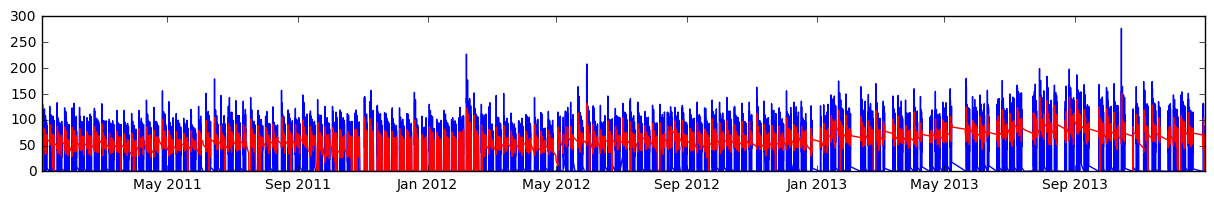

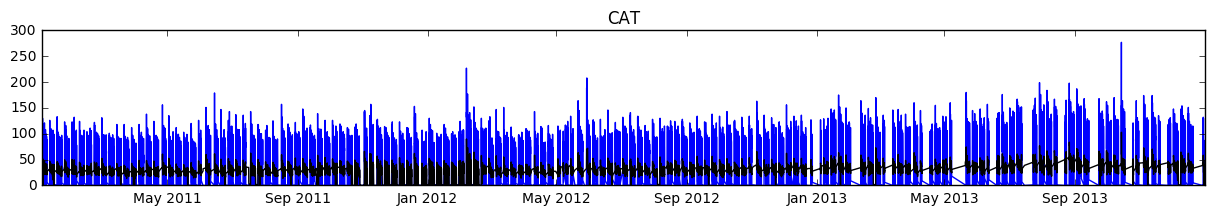

In [36]:
# Plot CAT
ass=uni_ass[0]

plt.figure(figsize=(15,2))
plt.plot(subdata[ass]['prediction'], label=ass)
plt.plot(pd.rolling_mean(subdata[ass]['prediction'], window=12), color='red', label='Rolling Mean')
plt.figure(figsize=(15,2))
plt.plot(subdata[ass]['prediction'], label=ass)
plt.plot(pd.rolling_std(subdata[ass]['prediction'], window=12), color='black', label='Rolling Std')
plt.title(ass)

Weekday  
With these graphs below, it says:   
1. from monday to friday, the percents of calls are quite equal and bigger than weekend. The tuesday(green) and friday(violet) are highest.
2. The number of call of holidays is quite smaller than other days (9.15% and 90.85%).  
3. The number of call of holidays is quite smaller than other days (4.76% and 95.24%).

So, the feature DAY_OFF and WEEK_END will help us to forecast Time Series.

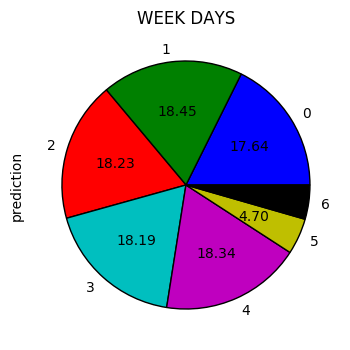

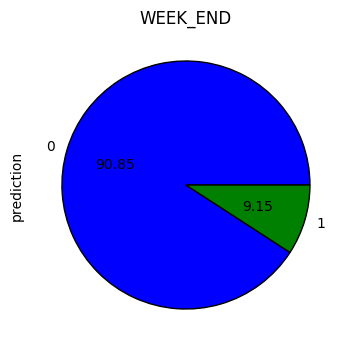

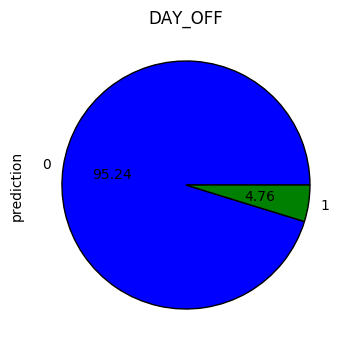

In [34]:
plot_data.groupby('DAY_WE_DS').count().plot(y='prediction', kind='pie', autopct='%.2f', figsize=(4, 4), legend=None, title='WEEK DAYS')
plot_data.groupby('WEEK_END').count().plot(y='prediction', kind='pie', autopct='%.2f', figsize=(4, 4), legend=None, title='WEEK_END')
plot_data.groupby('DAY_OFF').count().plot(y='prediction', kind='pie', autopct='%.2f', figsize=(4, 4), legend=None, title='DAY_OFF')

# Data Scaling
  
Hour + minute => range(0-47). For ex, 1:00=2, 1:30=3, 2:00=4, etc 

# Data Transformation

We tried to tranform our data with log function and exponentially weighted moving average for Estimating & Eliminating Trend. But it doesn't work. The result are worse.

In [37]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    plt.figure(figsize=(15,2))
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

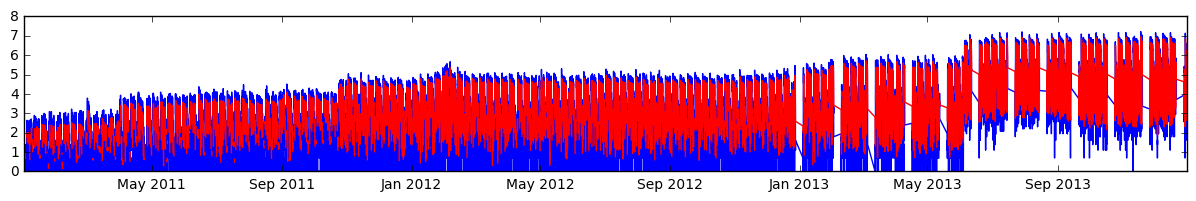

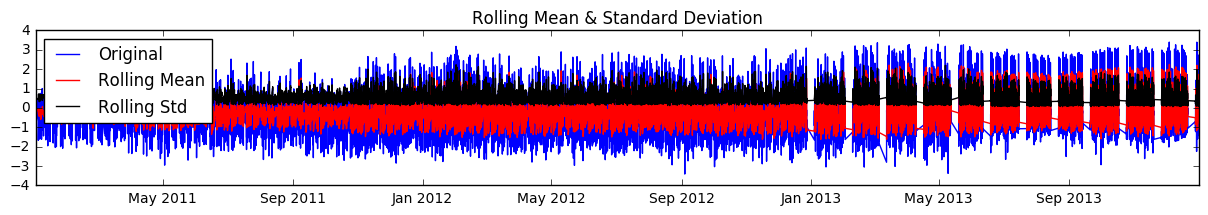

In [38]:
teleph_log = np.log(subdata[uni_ass[-1]]['prediction'])
# teleph_log = subdata[uni_ass[-1]]['prediction']
moving_avg = pd.rolling_mean(teleph_log, 12)

plt.figure(figsize=(15,2))
plt.plot(teleph_log)
plt.plot(moving_avg, color='red')

teleph_log_moving_avg_diff = teleph_log - moving_avg
teleph_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(teleph_log_moving_avg_diff)

# plt.figure(figsize=(15,2))
# plt.plot(teleph_log, label=ass)
# plt.plot(moving_avg, color='red', label='Rolling Mean')
# #     plt.legend(loc='best')
# plt.title(ass)

We can see here, the trend is eliminated.

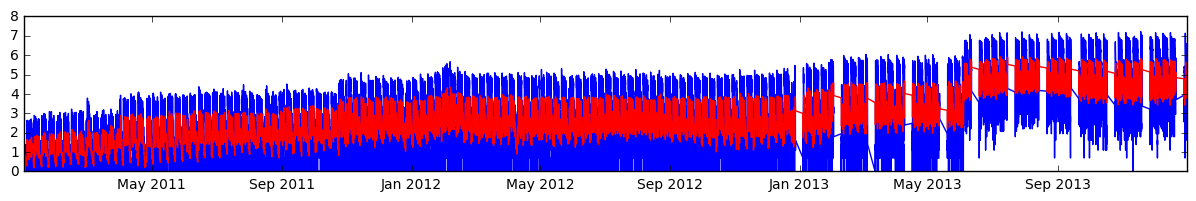

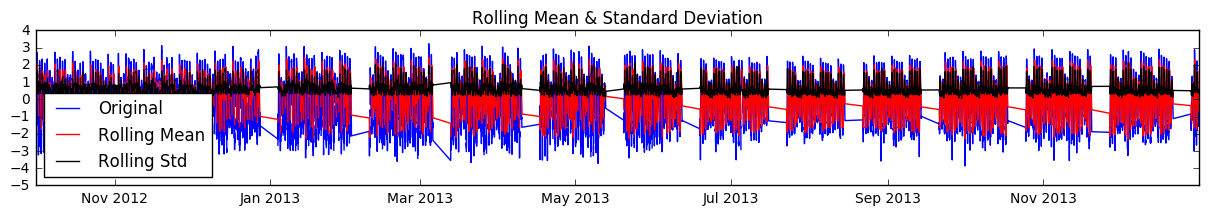

LinAlgError: SVD did not converge

In [40]:
expwighted_avg = pd.ewma(teleph_log, halflife=12)
plt.figure(figsize=(15,2))
plt.plot(teleph_log)
plt.plot(expwighted_avg, color='red')

plt.figure()
ts_log_ewma_diff = teleph_log - expwighted_avg
test_stationarity(ts_log_ewma_diff['2012-10-01':])